# Introduction to pandas  

Pandas allows us to work with tables. We can load tables from files or generate them from dictionaries

### dictionaries

Dictionaries consist of pairs of keys and values:  
enter the key and get the value

In [1]:
d = {
    'China': {
        'population': 1394880000,
        'co2': 10641789
    },
    'India': {
        'population': 1338860000,
        'co2': 2454968
    },
    'United States': {
        'population': 328082000,
        'co2': 5172336
    }
}

In [2]:
d.keys()

dict_keys(['China', 'India', 'United States'])

In [3]:
d.values()

dict_values([{'population': 1394880000, 'co2': 10641789}, {'population': 1338860000, 'co2': 2454968}, {'population': 328082000, 'co2': 5172336}])

In [4]:
d['India']

{'population': 1338860000, 'co2': 2454968}

In [5]:
d['India']['population']

1338860000

## dictionaries can be transformed into tables (data frames)

For this, we load pandas

In [6]:
import pandas as pd

/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


We turn the dictionary into a table

In [7]:
countries_df = pd.DataFrame(d)

In [8]:
countries_df

,China,India,United States
co2,10641789,2454968,5172336
population,1394880000,1338860000,328082000


The table/dataframe has columns, rows, and values

### columns

In [9]:
countries_df.columns

Index(['China', 'India', 'United States'], dtype='object')

### rows

In [10]:
countries_df.index

Index(['co2', 'population'], dtype='object')

### values

In [11]:
countries_df.values

array([[  10641789,    2454968,    5172336],
       [1394880000, 1338860000,  328082000]])

### Rows and columns can be switched by transposing (rotating 90°)

In [12]:
countries_df

,China,India,United States
co2,10641789,2454968,5172336
population,1394880000,1338860000,328082000


In [13]:
countries_df = countries_df.T

In [14]:
countries_df

,co2,population
China,10641789,1394880000
India,2454968,1338860000
United States,5172336,328082000


### Indexing of dataframes

We can select a specific row

In [15]:
countries_df.loc[['China'], :]

,co2,population
China,10641789,1394880000


Or a specific column

In [16]:
countries_df.loc[:, ['population']]

,population
China,1394880000
India,1338860000
United States,328082000


we can select multiple rows or multiple columns, or combinations of the two

In [17]:
countries_df.loc[['China', 'India'], ['population']]

,population
China,1394880000
India,1338860000


## First plotting

### we load the matplotlib module

In [18]:
import matplotlib.pyplot as plt

The population will be on the x-axis

In [19]:
countries_df.loc[:, ['population']]

,population
China,1394880000
India,1338860000
United States,328082000


The CO2 emission will be on the y-axis 

In [20]:
countries_df.loc[:, ['co2']]

,co2
China,10641789
India,2454968
United States,5172336


### A simple scatterplot

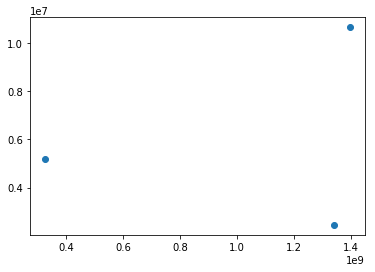

In [21]:
plt.plot(countries_df.loc[:, ['population']], countries_df.loc[:, ['co2']],
         'o')

## Preview: Plotting more appealing figures

### we first import the seaborn module, which includes more appealing figure settings

In [22]:
import seaborn as sns

In [23]:
sns.set_context('talk')

### we scale the variables

**before:**

In [24]:
countries_df

,co2,population
China,10641789,1394880000
India,2454968,1338860000
United States,5172336,328082000


divide population by billion

In [25]:
countries_df.loc[:,['population']] = countries_df.loc[:,['population']]/1000000000.0

divide co2 by million

In [26]:
countries_df.loc[:,['co2']] = countries_df.loc[:,['co2']]/1000000.

**after**

In [27]:
countries_df

,co2,population
China,10.641789,1.394880
India,2.454968,1.338860
United States,5.172336,0.328082


### we plot the results

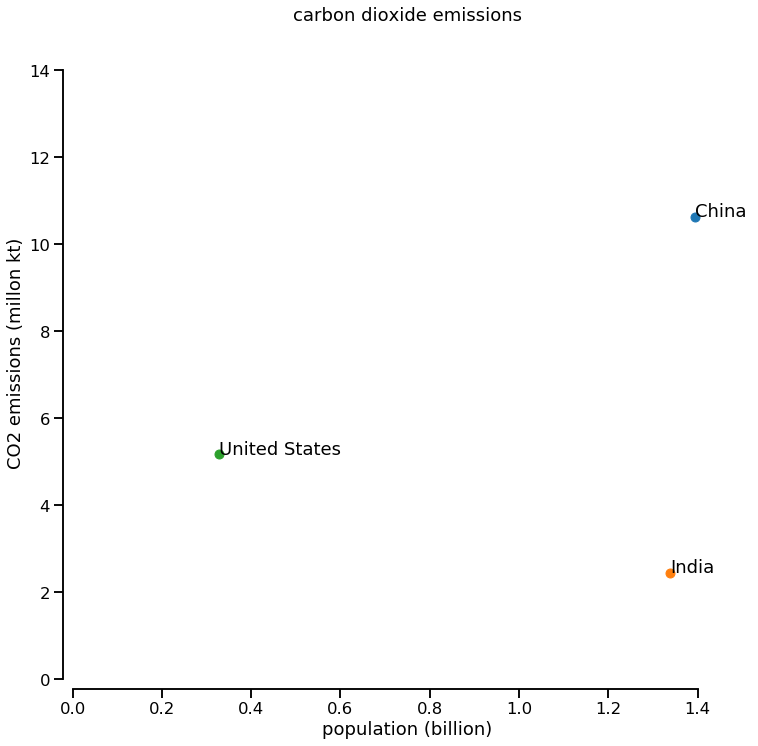

In [28]:
plt.figure(figsize=(12, 12))

for i in countries_df.index:

    x_val = countries_df.loc[i, 'population']
    y_val = countries_df.loc[i, 'co2']

    plt.plot(x_val, y_val, 'o')
    plt.annotate(xy=(x_val, y_val), s=i)

plt.xlim(0, 1.5)
plt.ylim(0, 15)

plt.xlabel('population (billion)')
plt.ylabel('CO2 emissions (millon kt)')
plt.title('carbon dioxide emissions')

sns.despine(offset=10, trim=True)
plt.show()